Iteration: 1
MSE = 454995714061.7692
New Weights:
W0 = 3.3210086923076925
W1 = 210.95675784615383

Iteration: 2
MSE = 415122077934.2128
New Weights:
W0 = 4.582748201737763
W1 = 403.85611312415506

Iteration: 3
MSE = 378744765278.50256
New Weights:
W0 = 5.787876646120694
W1 = 588.1042742896936

Iteration: 4
MSE = 345557200647.62537
New Weights:
W0 = 6.9389329314123875
W1 = 764.0892320690133

Iteration: 5
MSE = 315279690690.994
New Weights:
W0 = 8.038342098135503
W1 = 932.1815764917953

Iteration: 6
MSE = 287657066995.33844
New Weights:
W0 = 9.088420428042369
W1 = 1092.7352772815666

Iteration: 7
MSE = 262456535613.30658
New Weights:
W0 = 10.091380321753114
W1 = 1246.0884292469789

Iteration: 8
MSE = 239465715156.35236
New Weights:
W0 = 11.049334957640376
W1 = 1392.5639642436115

Iteration: 9
MSE = 218490846917.6275
New Weights:
W0 = 11.964302741771277
W1 = 1532.4703312055485

Iteration: 10
MSE = 199355161940.41547
New Weights:
W0 = 12.838211558277395
W1 = 1666.1021456787441

Iteration: 

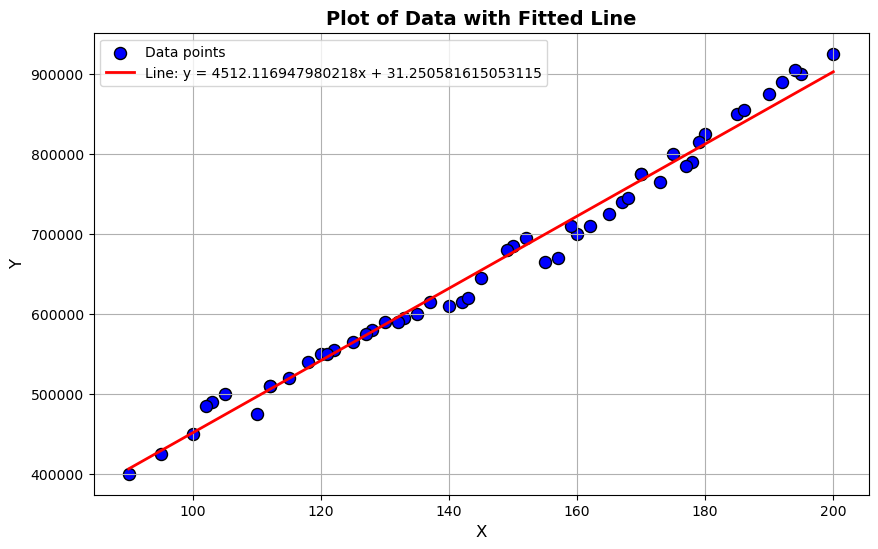

In [8]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import pickle

def plot_data(slope, intercept, dataset):
    x_vals = [d[0] for d in dataset]
    y_vals = [d[1] for d in dataset]
    plt.figure(figsize=(10, 6))
    plt.scatter(x_vals, y_vals, c='b', edgecolors='k', s=75, label='Data points')
    x_min, x_max = min(x_vals), max(x_vals)
    plt.plot([x_min, x_max], [slope * x_min + intercept, slope * x_max + intercept], 'r', linewidth=2, label=f'Line: y = {slope}x + {intercept}')
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.title('Plot of Data with Fitted Line', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()

def mean_squared_error(size, y_true, y_pred):
    total_error = sum((y_true[i] - y_pred[i])**2 for i in range(size)) / size
    return total_error

def finding_actual(size, x, w0, w1):
    y_pred = [w0 + w1 * x[i] for i in range(size)]
    return y_pred

def differentiate_1(y_pred, y_true, x, size):
    total = sum((y_pred[i] - y_true[i]) * x[i] for i in range(size))
    return (2 / size) * total

def differentiate_0(y_pred, y_true, size):
    total = sum(y_pred[i] - y_true[i] for i in range(size))
    return (2 / size) * total

def update_weights(w0, w1, y_pred, y_true, size, x):
    w0 -= 0.000001 * differentiate_0(y_pred, y_true, size)
    w1 -= 0.000001 * differentiate_1(y_pred, y_true, x, size)
    return w0, w1

def main():
    data_file = 'data.csv'
    price_prediction = pd.read_csv(data_file)
    y_actual = price_prediction['PRICE'].values
    x = price_prediction['PLOTS'].values
    size = len(x)
    w0, w1 = random.randint(1, 5), random.randint(6, 10)
    for iteration in range(400):
        print(f"Iteration: {iteration + 1}")
        y_pred = finding_actual(size, x, w0, w1)
        MSE = mean_squared_error(size, y_actual, y_pred)
        print(f"MSE = {MSE}")
        w0, w1 = update_weights(w0, w1, y_pred, y_actual, size, x)
        print(f"New Weights:\nW0 = {w0}\nW1 = {w1}\n")
    data = [(x[i], y_actual[i]) for i in range(size)]
    plot_data(w1, w0, data)
    with open("model.pkl", "wb") as f:
        pickle.dump([w0,w1], f)

main()



In [11]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)
print (model)

[31.250581615053115, 4512.116947980218]
